In [1]:
import os
import json
from glob import glob
import random
import cv2
import matplotlib.pyplot as plt

<h1 align="center">SSSGAN:Satellite Style and StructureGenerative Adversarial Networks</h1>

## Inference examples

Define configuration file for visualization as `./predict_and_visualize/vis_config/vis_config.json` format

In [2]:
vis_config = json.load(open("./predict_and_visualize/vis_config/vis_config.json"))
vis_config

[{'vis_name': 'baseline',
  'model_name': 'baseline',
  'version': 'latest',
  'script': 'python test.py --name {} --dataset_mode custom --label_dir {} --image_dir {} --label_nc 2  --contain_dontcare_label --no_instance --gpu_ids 2 --batchSize 1',
  'position': [1, 1]},
 {'vis_name': 'semantic',
  'model_name': 'semantic',
  'version': 'latest',
  'script': 'python test_satellite.py --name {} --dataset_mode satellite --label_dir {} --image_dir {} --global_descriptor_dir /datasets/INRIA/global_descriptor_vec --label_nc 2  --contain_dontcare_label --no_instance --gpu_ids 2 --batchSize 1 --preprocess_mode none --no_initial_structure --satellite_generator_mode global_area_vector',
  'position': [1, 2]},
 {'vis_name': 'semantic+dense',
  'model_name': 'semantic#dense',
  'version': 'latest',
  'script': 'python test_satellite.py --name {} --dataset_mode satellite --label_dir {} --image_dir {} --global_descriptor_dir /datasets/INRIA/global_descriptor_vec --label_nc 2  --contain_dontcare_labe

Run visualization script:

In [60]:
!python ./predict_and_visualize/predict_and_visualize.py

Select test images
TEST
----------------- Options ---------------
             aspect_ratio: 1.0                           
                batchSize: 1                             
      cache_filelist_read: False                         
     cache_filelist_write: False                         
          checkpoints_dir: ./checkpoints                 
   contain_dontcare_label: True                          	[default: False]
                crop_size: 256                           
                 dataroot: ./datasets/cityscapes/        
             dataset_mode: custom                        	[default: coco]
          display_winsize: 256                           
                  gpu_ids: 2                             	[default: 0]
                 how_many: inf                           
                image_dir: test_samples/images           	[default: None]
                init_type: xavier                        
            init_variance: 0.02                          
  

dataset [SatelliteDataset] of size 38 was created
/usr/local/lib/python3.6/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
process image... test_samples/images/austin5_1024_3200.jpg
process image... test_samples/images/austin16_1536_3840.jpg
process image... test_samples/images/austin17_384_0.jpg
process image... test_samples/images/austin19_4352_1536.jpg
process image... test_samples/images/austin20_2688_3072.jpg
process image... test_samples/images/austin24_2688_3584.jpg
process image... test_samples/images/austin26_2432_4224.jpg
process image... test_samples/images/austin28_2176_2304.jpg
process image... test_samples/images/austin28_2816_2944.jpg
process image... test_samples/images/austin35_4096_4096.jpg
process image... test_samples/images/chicago5_384_1280.jpg
process image... test_samples/images/chicago6_1920_2432.jpg
process image... tes

process image... test_samples/images/vienna27_3456_4608.jpg
VIS
Generate collage
Processing  austin17_384_0.jpg
Processing  austin28_2176_2304.jpg
Processing  chicago15_2688_3968.jpg
Processing  austin24_2688_3584.jpg
Processing  chicago9_3584_0.jpg
Processing  austin28_2816_2944.jpg
Processing  chicago18_1664_256.jpg
Processing  vienna24_3840_512.jpg
Processing  vienna15_4736_1024.jpg
Processing  chicago6_1920_2432.jpg
Processing  tyrol-w18_2816_1536.jpg
Processing  vienna4_3456_1664.jpg
Processing  chicago5_384_1280.jpg
Processing  austin5_1024_3200.jpg
Processing  tyrol-w25_2560_3072.jpg
Processing  vienna3_3200_1536.jpg
Processing  vienna20_896_4608.jpg
Processing  tyrol-w18_2304_2816.jpg
Processing  tyrol-w18_2432_1280.jpg
Processing  austin16_1536_3840.jpg
Processing  vienna14_256_4352.jpg
./predict_and_visualize/predict_and_visualize.py:95: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retaine

A folder is created in `./vis/baseline#semantic#semantic+dense`
* Each subfolder contains individual predictions for each network

* Comparisison visualizationare stored in root folder

In [4]:
!tree ./vis

./vis
└── baseline#semantic#semantic+dense
    ├── austin16_1536_3840.png
    ├── austin28_2816_2944.png
    ├── austin35_4096_4096.png
    ├── baseline
    │   └── predictions
    │       ├── austin16_1536_3840.png
    │       ├── austin28_2816_2944.png
    │       ├── austin35_4096_4096.png
    │       ├── chicago11_2560_384.png
    │       ├── chicago15_2688_3968.png
    │       ├── chicago34_4736_3584.png
    │       ├── chicago5_384_1280.png
    │       ├── chicago6_1920_2432.png
    │       ├── tyrol-w13_3712_2048.png
    │       ├── tyrol-w18_2304_2816.png
    │       ├── tyrol-w18_2432_1280.png
    │       ├── tyrol-w23_2816_4096.png
    │       ├── tyrol-w25_2560_3072.png
    │       ├── tyrol-w8_2048_2560.png
    │       └── vienna20_896_4608.png
    ├── chicago11_2560_384.png
    ├── chicago15_2688_3968.png
    ├── chicago34_4736_3584.png
    ├── chicago5_384_1280.png
    ├── chicago6_1920_2432.png
    ├── original
    │   ├── gt
    │   │   ├── austin16_1536_3840.jpg
    │ 

In [5]:
comparison_images = glob(os.path.join("vis", "baseline#semantic#semantic+dense", "*.png"))

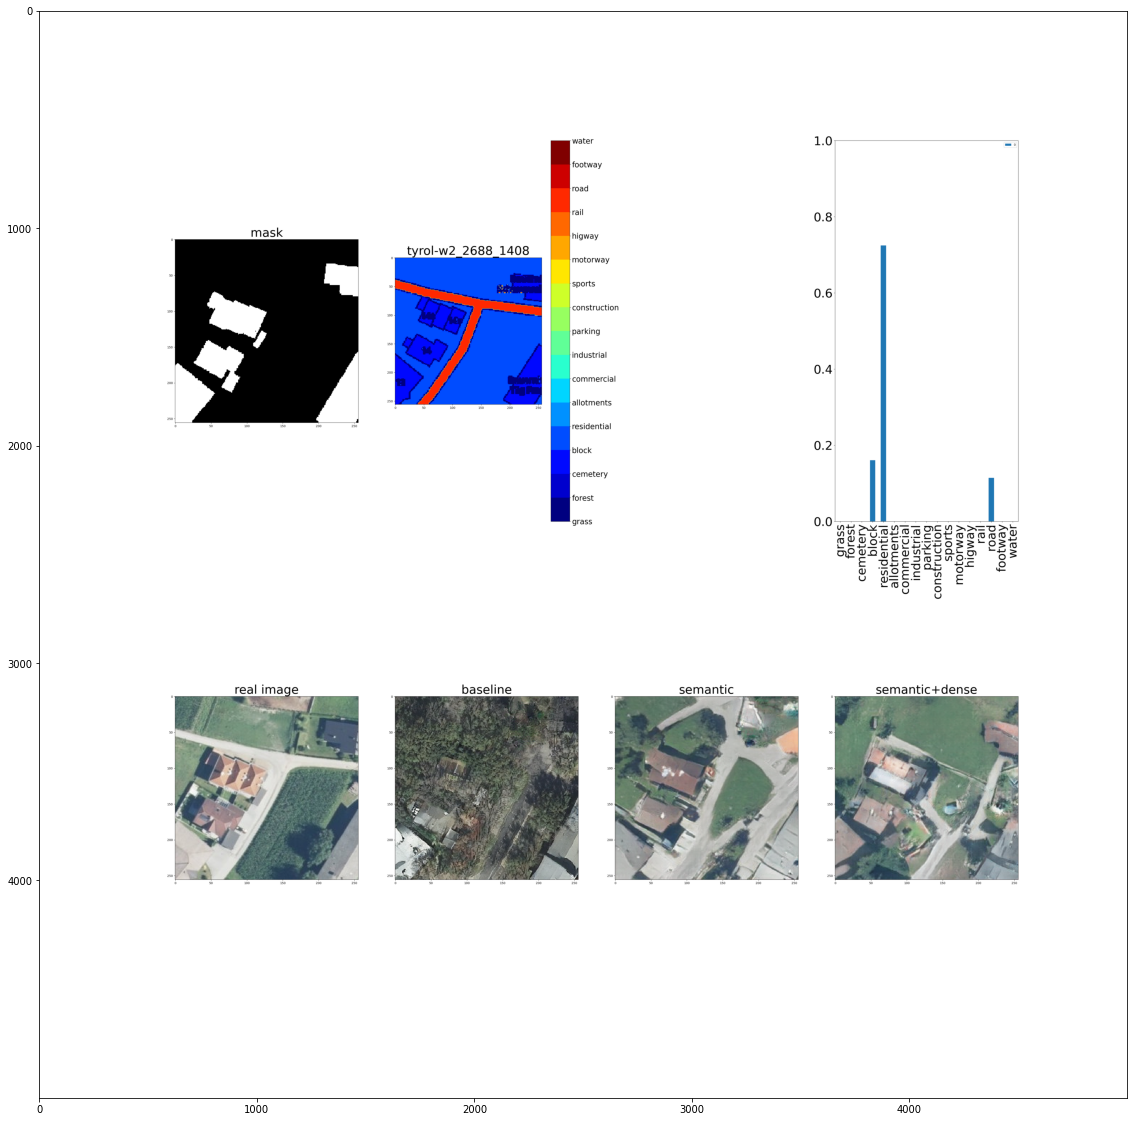

In [16]:
image_path = random.choice(comparison_images)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.imshow(img)

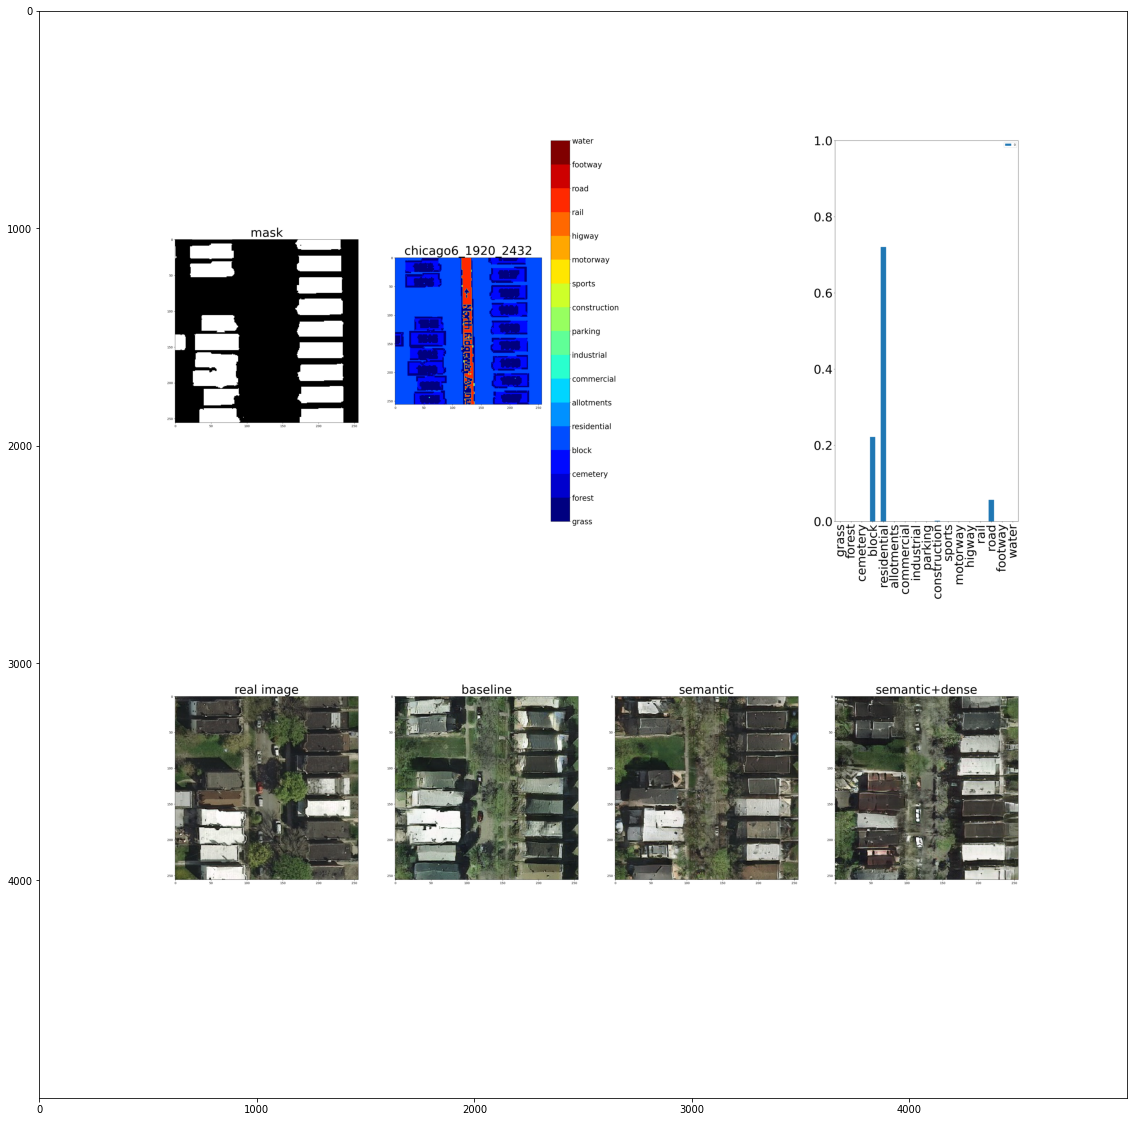

In [11]:
image_path = random.choice(comparison_images)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.imshow(img)

## Visuallize collage of semantic vector modifications

Execute the linux script, that creates many folder inside `./vis`

In [72]:
!sh semantic_manipulation_collage.sh

----------------- Options ---------------
             aspect_ratio: 1.0                           
                batchSize: 1                             
      cache_filelist_read: False                         
     cache_filelist_write: False                         
          checkpoints_dir: ./checkpoints                 
   contain_dontcare_label: True                          	[default: False]
                crop_size: 256                           
                 dataroot: ./datasets/cityscapes/        
             dataset_mode: satellite                     	[default: coco]
          display_winsize: 256                           
    global_descriptor_dir: /datasets/INRIA/global_descriptor_vec	[default: ]
                  gpu_ids: 0                             
                 how_many: inf                           
                image_dir: /datasets/INRIA/dataset/train/images/	[default: None]
                init_type: xavier                        
            i

/usr/local/lib/python3.6/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
tyrol-w8_2048_2560.jpg
/usr/local/lib/python3.6/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
austin28_2816_2944.jpg
/usr/local/lib/python3.6/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
tyrol-w18_2304_2816.jpg
/usr/local/lib/python3.6/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
austin28_2176_2304.jpg
/usr/local/lib/python3.6/site-packages/torc

In [67]:
!tree ./vis/semantic_collage

./vis/semantic_collage
├── austin16_1536_3840.jpg
├── austin17_384_0.jpg
├── austin19_4352_1536.jpg
├── austin20_2688_3072.jpg
├── austin24_2688_3584.jpg
├── austin26_2432_4224.jpg
├── austin28_2176_2304.jpg
├── austin28_2816_2944.jpg
├── austin35_4096_4096.jpg
├── austin5_1024_3200.jpg
├── chicago11_2560_384.jpg
├── chicago15_2688_3968.jpg
├── chicago18_1664_256.jpg
├── chicago26_2048_1664.jpg
├── chicago34_4736_3584.jpg
├── chicago5_384_1280.jpg
├── chicago6_1920_2432.jpg
├── chicago7_2816_3456.jpg
├── chicago9_3200_512.jpg
├── chicago9_3584_0.jpg
├── tyrol-w13_3712_2048.jpg
├── tyrol-w18_2304_2816.jpg
├── tyrol-w18_2432_1280.jpg
├── tyrol-w18_2816_1536.jpg
├── tyrol-w23_2816_4096.jpg
├── tyrol-w25_2560_3072.jpg
├── tyrol-w2_2688_1408.jpg
├── tyrol-w2_512_0.jpg
├── tyrol-w30_2816_2816.jpg
├── tyrol-w8_2048_2560.jpg
├── vienna12_4224_2816.jpg
├── vienna14_256_4352.jpg
├── vienna15_4736_1024.jpg
├── vienna16_4352_2816.jpg
├── vienna20_896_4608.jpg
├── vienna24_3840_512.jpg
├── vienna27

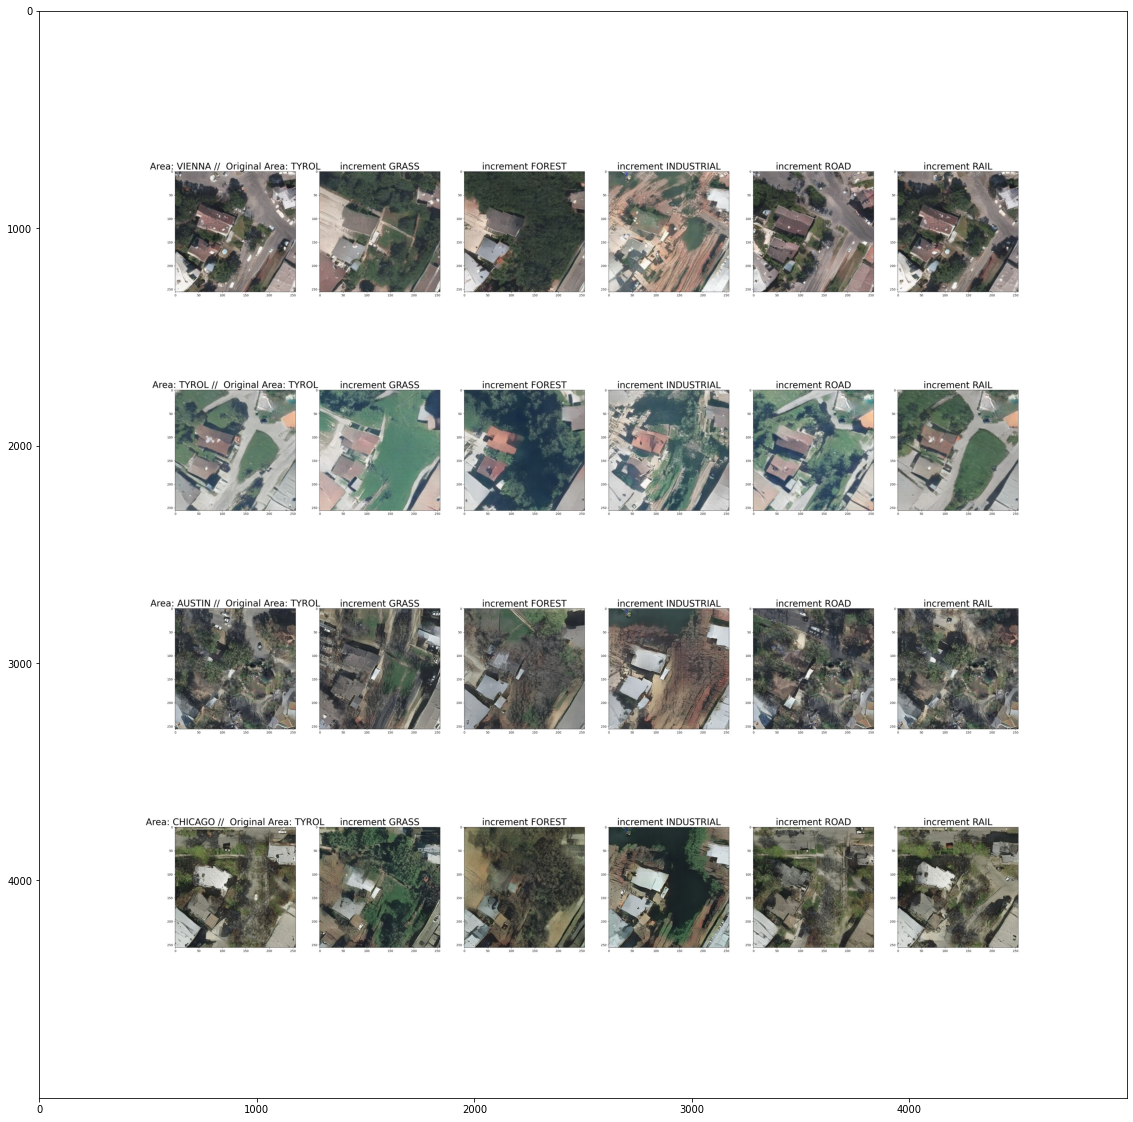

In [68]:
comparison_images = glob(os.path.join("vis", "semantic_collage", "*.jpg"))
image_path = random.choice(comparison_images)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.imshow(img)

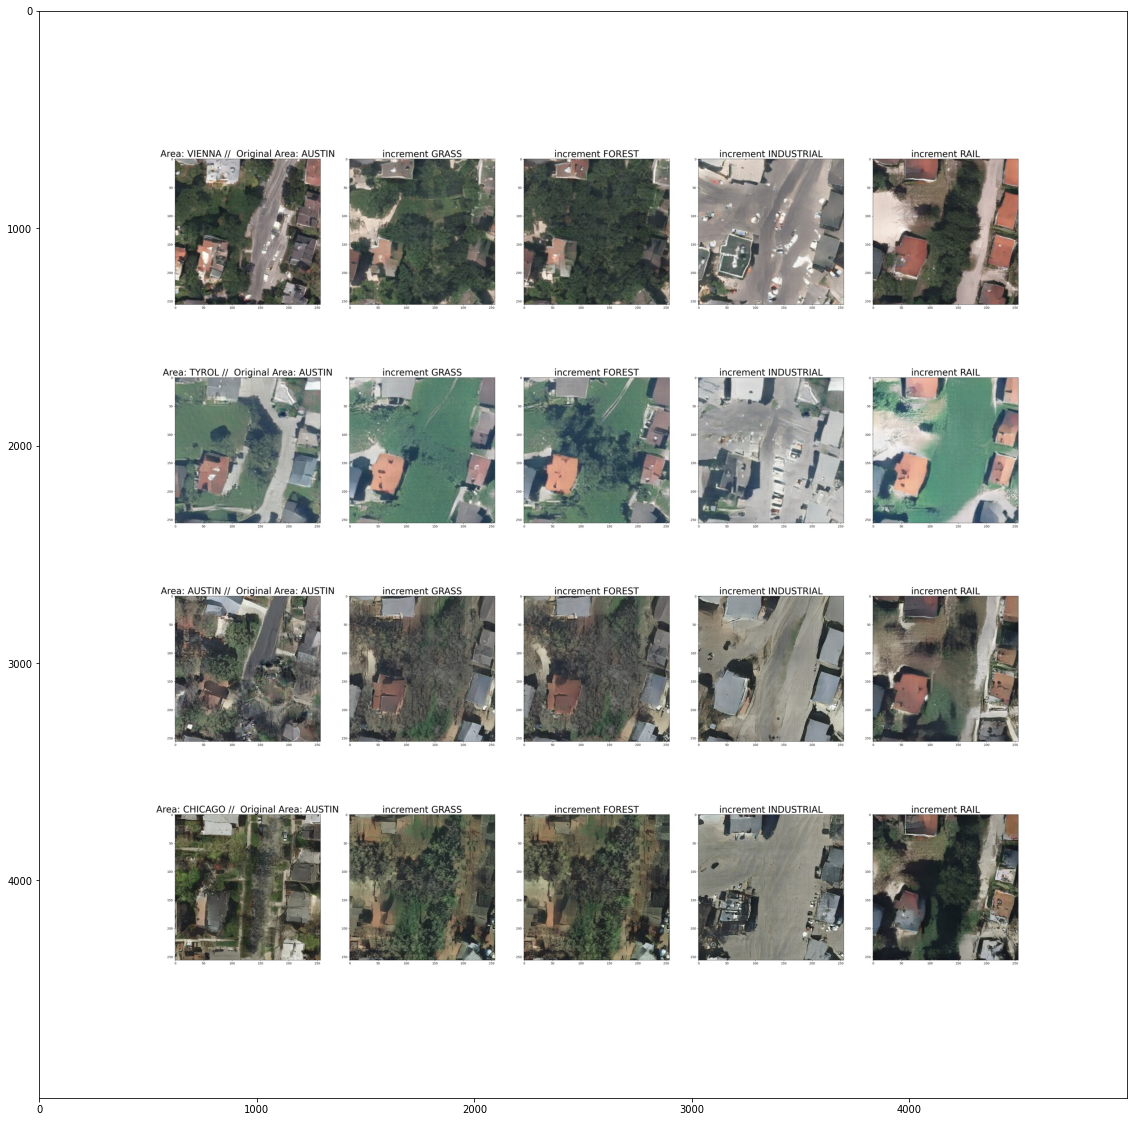

In [73]:
comparison_images = glob(os.path.join("vis", "semantic_collage", "*.jpg"))
image_path = random.choice(comparison_images)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.imshow(img)